# Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#plt.style.available

# Reading the dataset

In [3]:
#reading dataset
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Data Description:
1. **id**-->	Unique ID for the customer
2. **Gender**-->	Gender of the customer
3. **Age**-->	Age of the customer
4. **Driving_License**-->	0 : Customer does not have DL, 1 : Customer already has DL
5. **Region_Code**-->	Unique code for the region of the customer
6. **Previously_Insured**-->	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age**-->	Age of the Vehicle
8. **Vehicle_Damage**-->	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. **Annual_Premium**-->	The amount customer needs to pay as premium in the year
10. **PolicySalesChannel**-->	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. **Vintage**-->	Number of Days, Customer has been associated with the company
12. **Response**-->	1 : Customer is interested, 0 : Customer is not interested

# Descriptive Statistics

In [4]:
#checking description of numeric type
df.describe().style.background_gradient(cmap = 'copper')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
#checking description of object types
df.describe(include= 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
#rows and columns of dataset
df.shape

(381109, 12)

# Data Cleaning

In [7]:
#Checking for null values
df.isna().mean().round(4)*100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

* We don't have any null values in our dataset

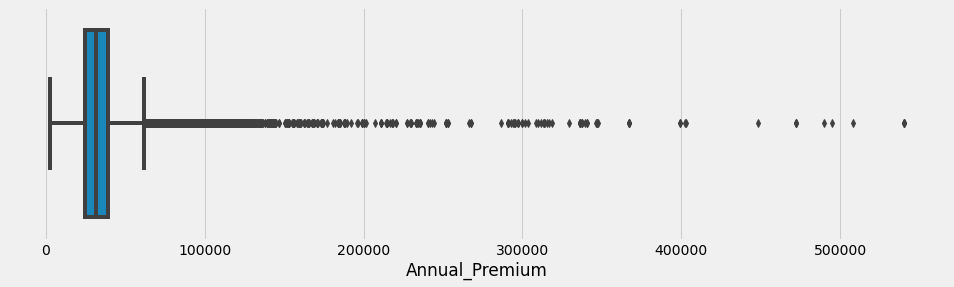

In [8]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.boxplot(df['Annual_Premium'])
plt.show()

In [9]:
# lets remove the outliers from the data

#lets check the shape before removing outliers
print("Before Removing Outliers ", df.shape)

# lets filter the records having more than 150000 annual premium
df = df[df['Annual_Premium'] < 150000]
#df['Annual_Premium'].values[df['Annual_Premium'].values>150000]=150000

#lets check the shape after removing outliers
print("After Removing Outliers ", df.shape)

Before Removing Outliers  (381109, 12)
After Removing Outliers  (380918, 12)


# Exploratory Data Analysis

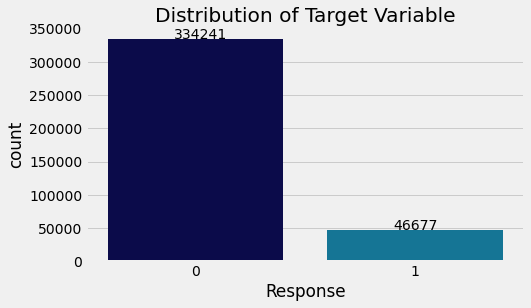

In [10]:
#analyzing target variable

plt.rcParams['figure.figsize']=7,4
ax=sns.countplot(df['Response'], palette = 'ocean')
for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()))
plt.title('Distribution of Target Variable')
plt.show()

In [11]:
print('Ratio:', round(df['Response'].value_counts()[0]/df['Response'].value_counts()[1],2), ':1')

Ratio: 7.16 :1


Target variable is highly imbalanced
* 0's => 87.75%
* 1's => 12.25%

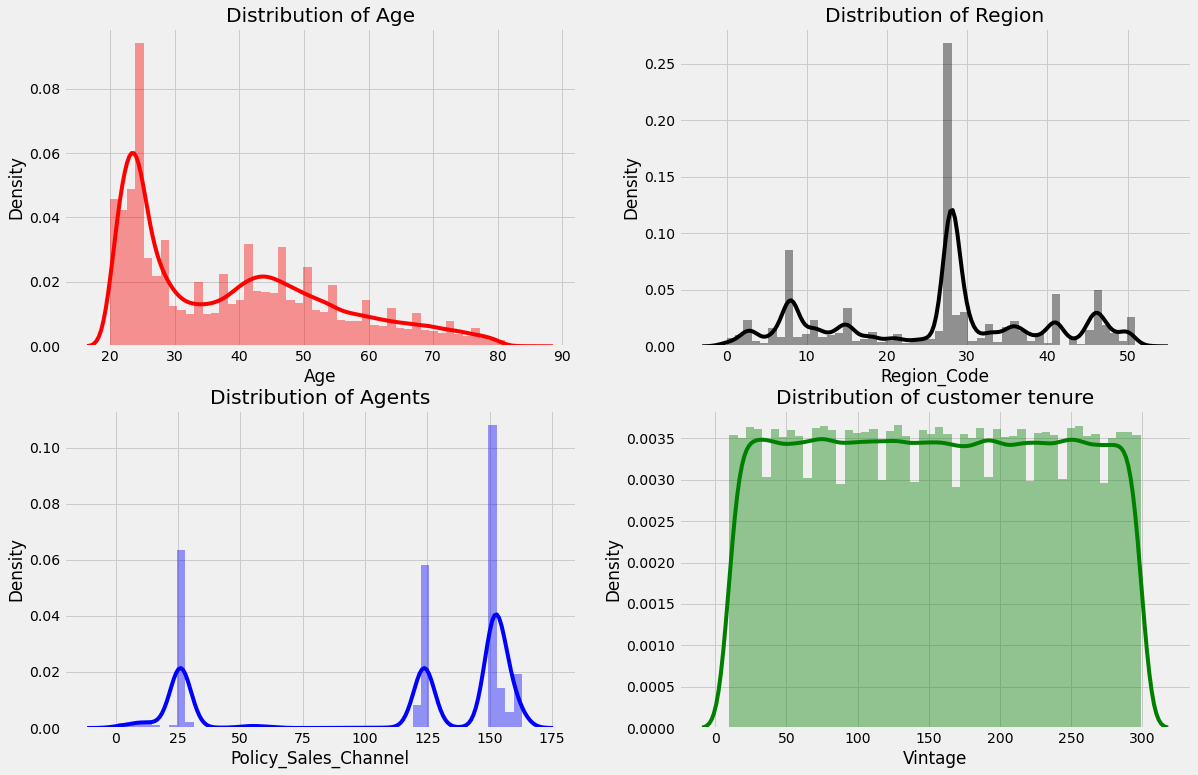

In [12]:
plt.rcParams['figure.figsize']=18,12
plt.subplot(221)
sns.distplot(df['Age'], color='red')
plt.title('Distribution of Age')

plt.subplot(222)
sns.distplot(df['Region_Code'], color='black')
plt.title('Distribution of Region')

plt.subplot(223)
sns.distplot(df['Policy_Sales_Channel'], color='blue')
plt.title('Distribution of Agents')

plt.subplot(224)
sns.distplot(df['Vintage'], color='green')
plt.title('Distribution of customer tenure')
plt.show()


* Most of the customer age ranges from 20 to 30
* Most of the records are from region 28
* Most of the customers are approached by policy channels 152, 26, 124
* On Vintage column distribution we can infer that customer's tenure is in uniform characteristics

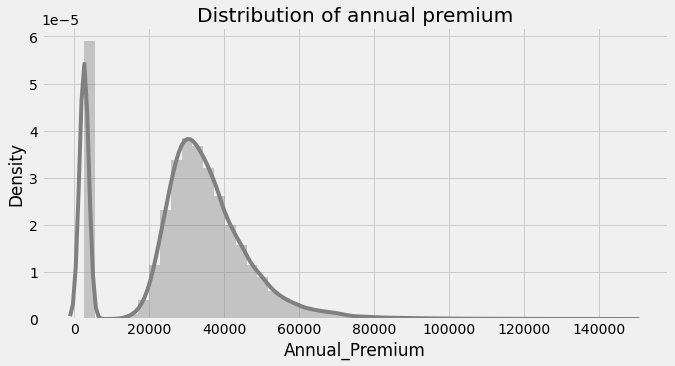

In [13]:
plt.rcParams['figure.figsize']=10,5
sns.distplot(df['Annual_Premium'], color='grey')
plt.title('Distribution of annual premium')
plt.show()

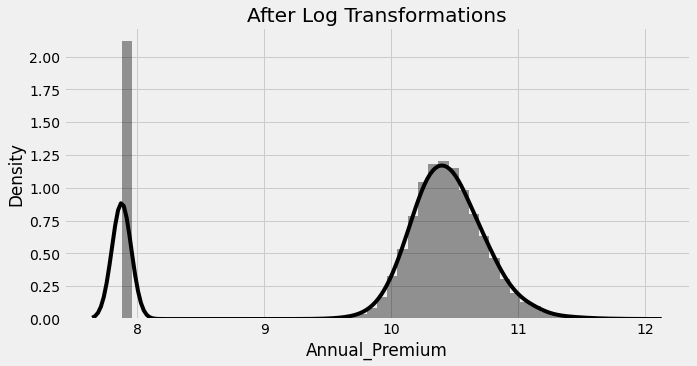

In [14]:
#lets remove skewness from Annual Premium, as it can add bias to the data

# lets apply log transformation to remove skewness
df['Annual_Premium'] = np.log1p(df['Annual_Premium'])

# lets plot them and check whether the skewness is removed or not
plt.rcParams['figure.figsize']=10,5
sns.distplot(df['Annual_Premium'], color = 'black')
plt.title('After Log Transformations')
plt.show()

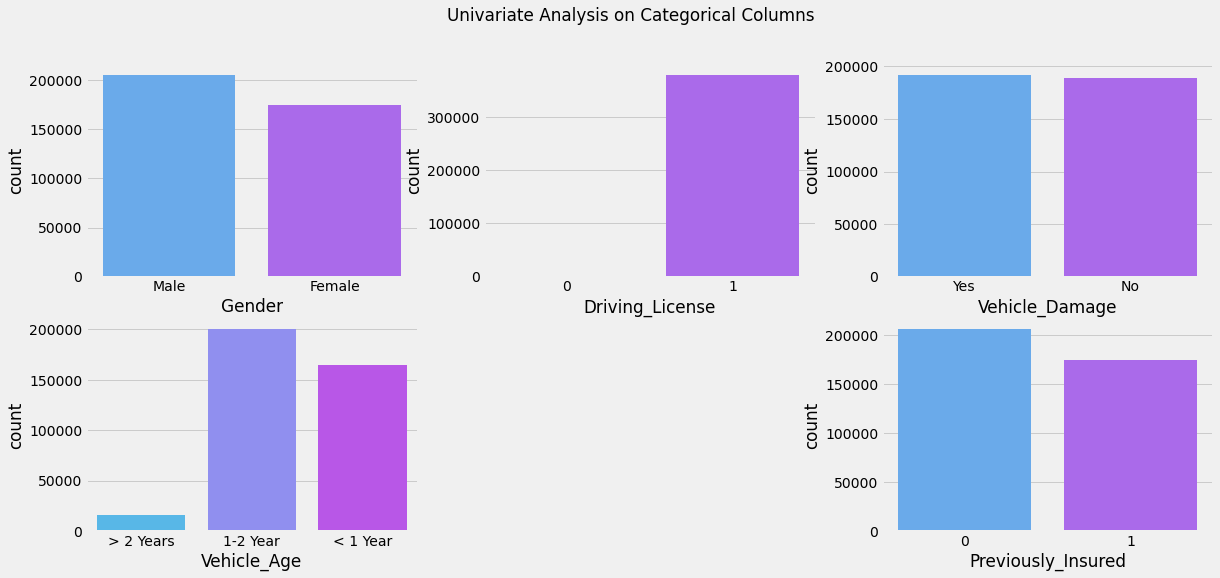

In [15]:
## Univariate Analysis on Categorical Columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 3, 1)
sns.countplot(df['Gender'], palette = 'cool')

plt.subplot(2, 3, 2)
sns.countplot(df['Driving_License'], palette = 'cool')

plt.subplot(2, 3, 3)
sns.countplot(df['Vehicle_Damage'], palette = 'cool')

plt.subplot(2, 3, 4)
sns.countplot(df['Vehicle_Age'], palette = 'cool')

plt.subplot(2, 3, 6)
sns.countplot(df['Previously_Insured'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

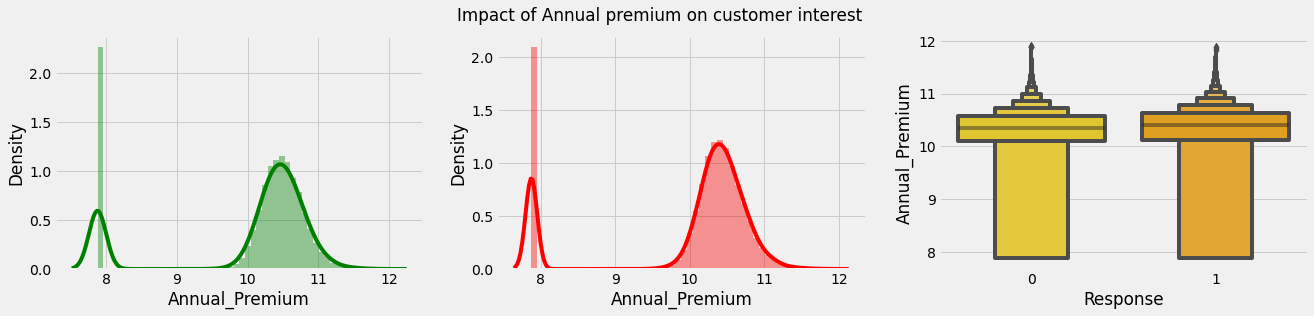

In [16]:
### Lets check the Impact of Annual premium on customer response

plt.rcParams['figure.figsize'] = (20, 4)
plt.subplot(131)
sns.distplot(df[df['Response']==1]['Annual_Premium'], color='green')

plt.subplot(132)
sns.distplot(df[df['Response']==0]['Annual_Premium'], color='red')

plt.subplot(133)
sns.boxenplot(df['Response'], df['Annual_Premium'], palette = 'Wistia')

plt.suptitle('Impact of Annual premium on customer interest')
plt.show()

* Annual premium doesn't have any influence on customer's interest 

In [17]:
print("Impact of Gender on Customer interest")
print(pd.crosstab(df['Response'], df['Gender']))
print('\n')

print("Impact of Previously_Insured on Customer interest")
print(pd.crosstab(df['Response'], df['Previously_Insured']))
print('\n')

print("Impact of Vehicle_Age on Customer interest")
print(pd.crosstab(df['Response'], df['Vehicle_Age']))
print('\n')

print("Impact of Vehicle_Damage on Customer interest")
print(pd.crosstab(df['Response'], df['Vehicle_Damage']))
print('\n')

print("Impact of Driving_License on Customer interest")
print(pd.crosstab(df['Response'], df['Driving_License']))
print('\n')

Impact of Gender on Customer interest
Gender    Female    Male
Response                
0         156746  177495
1          18176   28501


Impact of Previously_Insured on Customer interest
Previously_Insured       0       1
Response                          
0                   159842  174399
1                    46519     158


Impact of Vehicle_Age on Customer interest
Vehicle_Age  1-2 Year  < 1 Year  > 2 Years
Response                                  
0              165417    157527      11297
1               34780      7199       4698


Impact of Vehicle_Damage on Customer interest
Vehicle_Damage      No     Yes
Response                      
0               187632  146609
1                  982   45695


Impact of Driving_License on Customer interest
Driving_License    0       1
Response                    
0                771  333470
1                 41   46636




* Male showing more interest than female.
* customers who already insured are not showing interest.
* if the vehicle age is between 1-2 years are showing much intrest than other 2 categories.
* customers with past vehicle damage experience are showing interest.
* customer withour driving license are not showing interest.

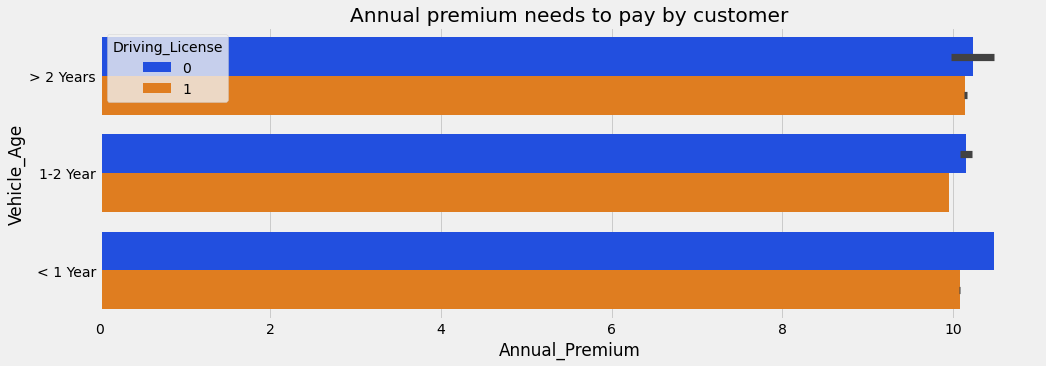

In [18]:
plt.rcParams['figure.figsize']=15,5
sns.barplot(y=df['Vehicle_Age'], x=df['Annual_Premium'], hue=df['Driving_License'], palette='bright')
plt.title('Annual premium needs to pay by customer')
plt.show()

* Customer with driving lisense are paying lesser annual premium than customer without driving lisense
* For customers with DL, their average annual premium varies based on the vehicle age.
* For customers without DL, their average annual premium doesn't varies much based on the vehicle age.

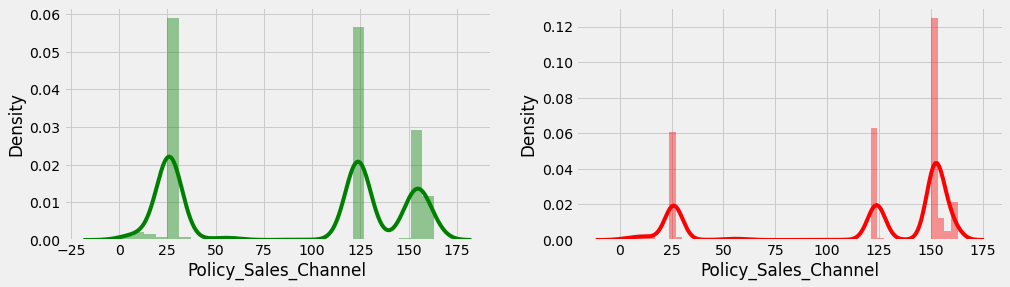

In [19]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(df[df['Response']==1]['Policy_Sales_Channel'], color='green')

plt.subplot(122)
sns.distplot(df[df['Response']==0]['Policy_Sales_Channel'], color='red')

plt.show()

* More record are from 26, 124, and 156.
* The ratio of customer showing interest is higher than not showing interest in policy channel 26.
* The ratio of customer showing interest is very low than not showing interest in policy channel 156.

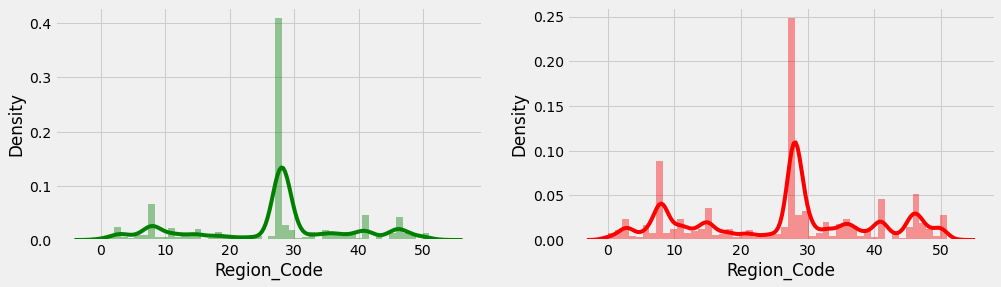

In [20]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(df[df['Response']==1]['Region_Code'], color='green')

plt.subplot(122)
sns.distplot(df[df['Response']==0]['Region_Code'], color='red')

plt.show()

* Region doesn't have any influence on customers interest on insurance

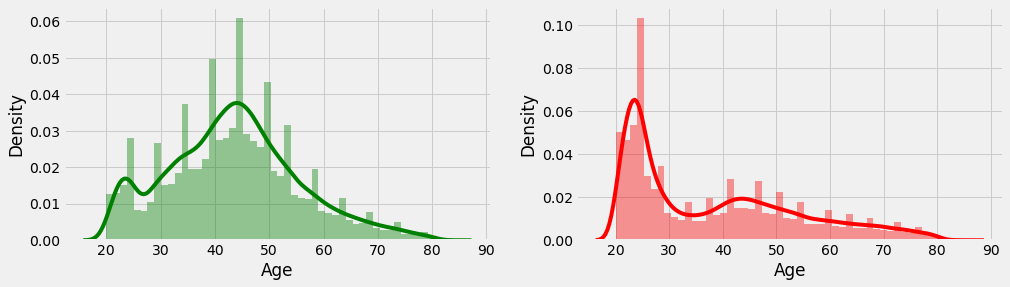

In [21]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(df[df['Response']==1]['Age'], color='green')

plt.subplot(122)
sns.distplot(df[df['Response']==0]['Age'], color='red')

plt.show()

* Customers at age 40 to 50 are showing more interest on insurance policy
* Customers between 20 and 30 age are not much interested on insurance policy

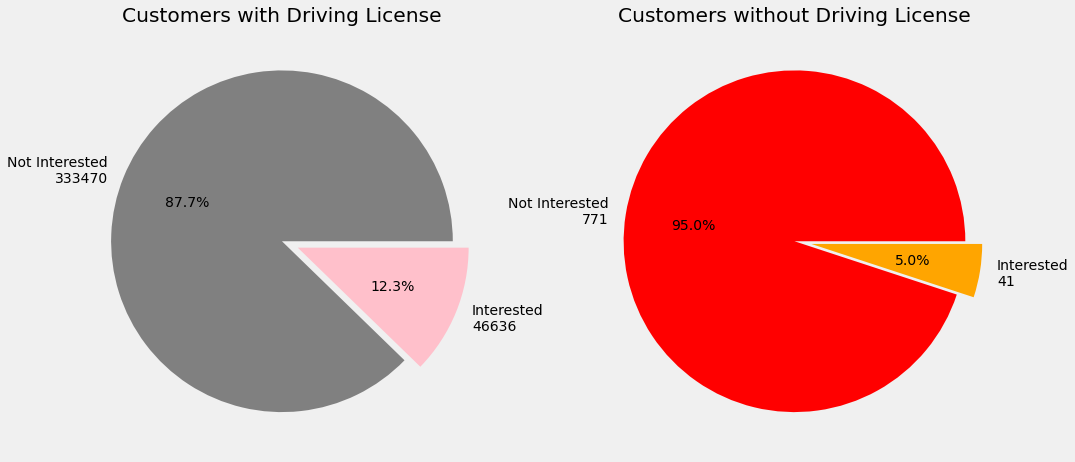

In [22]:
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(121)
plt.pie(df[(df['Driving_License']==1)]['Response'].value_counts(),
        labels=[f'Not Interested\n{len(df[(df.Driving_License==1)&(df.Response==0)])}',
                f'Interested\n{len(df[(df.Driving_License==1)&(df.Response==1)])}'], autopct='%1.1f%%',
       explode=[0,0.1], colors = ['grey','pink'])
plt.title('Customers with Driving License')

plt.subplot(122)
plt.pie(df[(df['Driving_License']==0)]['Response'].value_counts(),
        labels=[f'Not Interested\n{len(df[(df.Driving_License==0)&(df.Response==0)])}',
                f'Interested\n{len(df[(df.Driving_License==0)&(df.Response==1)])}'], autopct='%1.1f%%',
       explode=[0,0.1], colors = ['red','orange'])
plt.title('Customers without Driving License')
plt.show()

In [23]:
#from ipywidgets import interact_manual
#@interact_manual
#def viz(x=list(df.select_dtypes('number').columns)):
#    plt.rcParams['figure.figsize']=15,4
#    plt.subplot(121)
#    sns.distplot(df[df['Response']==1][x], color='green')
#    plt.subplot(122)
#    sns.distplot(df[df['Response']==0][x], color='red')

# Data Preparation

In [24]:
#import dabl
#df_clean = dabl.clean(df, target_col='Response', verbose=2)

In [25]:
#high cardinality
print(f'percentage of uniqueness of id column: {df.id.nunique()/len(df)*100}')

percentage of uniqueness of id column: 100.0


no. of unique values in 'Driving_License': 2
Unique values in 'Driving_License': [1 0]
% of uniqueness of 1 in 'Driving_License': 99.79
% of uniqueness of 0 in 'Driving_License': 0.21


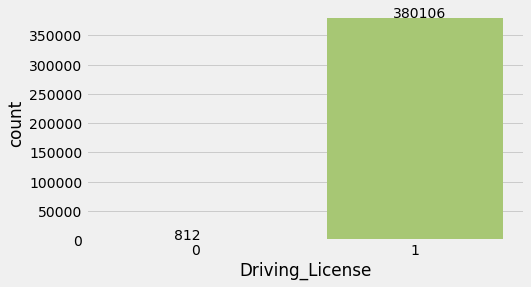

In [26]:
print(f'no. of unique values in \'Driving_License\': {df.Driving_License.nunique()}')
print(f'Unique values in \'Driving_License\': {df.Driving_License.unique()}')
print(f'% of uniqueness of 1 in \'Driving_License\': {round(df.Driving_License.value_counts()[1]/len(df)*100,2)}')
print(f'% of uniqueness of 0 in \'Driving_License\': {round(df.Driving_License.value_counts()[0]/len(df)*100,2)}')

plt.rcParams['figure.figsize']=7,4
ax=sns.countplot(df['Driving_License'], palette='summer')
for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()))
plt.show()

In [27]:
#dabl.detect_types(df_clean)

In [28]:
df.drop(['id', 'Driving_License'], axis=1, inplace=True)

In [29]:
#lets encode the object columns
df['Gender'] = df['Gender'].replace(('Male','Female'),(1, 0))
df['Vehicle_Age'] = df['Vehicle_Age'].replace(('< 1 Year','1-2 Year','> 2 Years'),(0,1,2))
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(('Yes','No'),(1, 0))

# lets check whether there is any object column left
df.select_dtypes('object').columns

Index([], dtype='object')

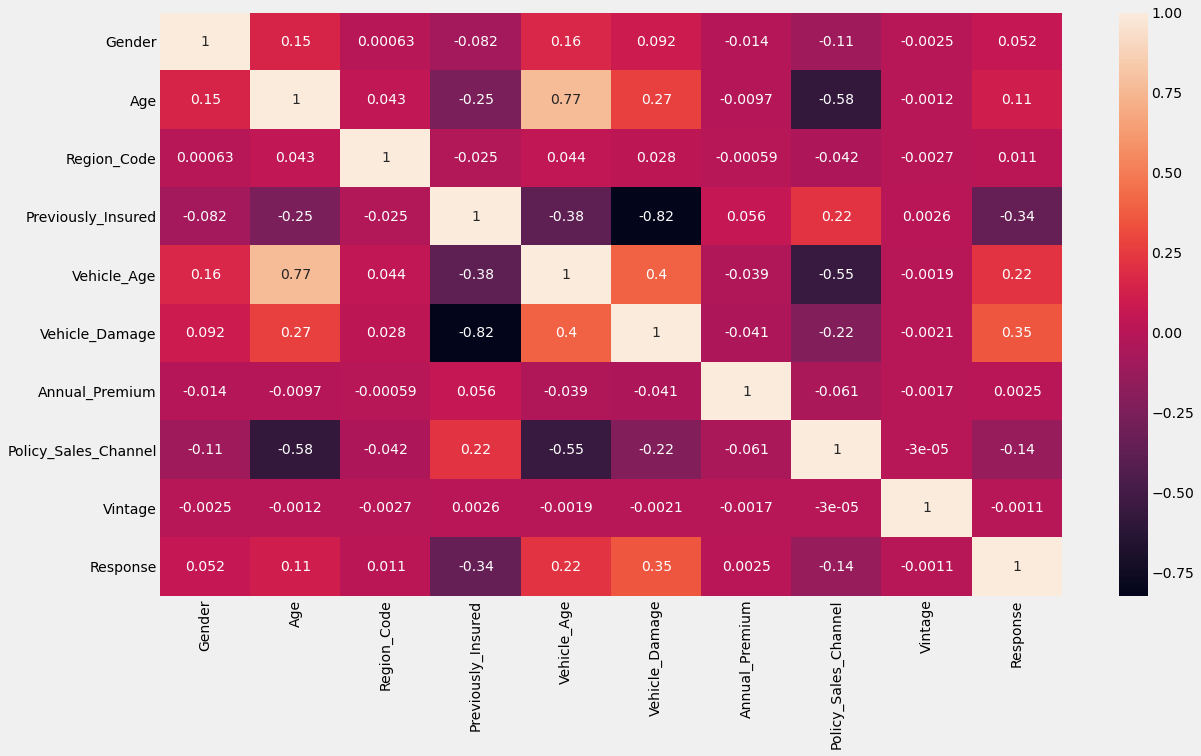

In [30]:
plt.rcParams['figure.figsize']=18,10
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
#plt.rcParams['figure.figsize'] = (15, 4)
#sns.pairplot(df,hue = 'Response', vars = ['Age','Region_code','Annual_Premium','Policy_Sales_Channel','Vintage'] )
#plt.show()

In [32]:
# lets split the Target column from the Data

y = df['Response']
x = df.drop(['Response'], axis = 1)

# lets check the shape of x and y
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (380918, 9)
Shape of y : (380918,)


### Oversampling for Balancing the Data

In [33]:
from imblearn.combine import SMOTETomek

x_resample, y_resample  = SMOTETomek().fit_resample(x, y)

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(657196, 9)
(657196,)


In [34]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample.value_counts())

Before Resampling :
0    334241
1     46677
Name: Response, dtype: int64
After Resampling :
Response
0           328598
1           328598
dtype: int64


In [35]:
# lets split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (525756, 9)
Shape of the y Train : (525756, 1)
Shape of the x Test : (131440, 9)
Shape of the y Test : (131440, 1)


### Standardize the independent features

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scl = sc.fit_transform(x_train)
x_test_scl = sc.transform(x_test)

# Model building

### Applying KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model =  KNeighborsClassifier()
model.fit(x_train_scl, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train_scl, y_train))
print("Testing Accuracy :", model.score(x_test_scl, y_test))

Training Accuracy : 0.8904168473588508
Testing Accuracy : 0.8459601339013999


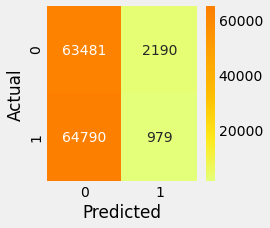

              precision    recall  f1-score   support

           0       0.49      0.97      0.65     65671
           1       0.31      0.01      0.03     65769

    accuracy                           0.49    131440
   macro avg       0.40      0.49      0.34    131440
weighted avg       0.40      0.49      0.34    131440



In [38]:
# lets analyze the Performance using Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Applying XGBoost

In [39]:
from xgboost import XGBClassifier

model =  XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8728326448010103
Testing Accuracy : 0.8689363968350579


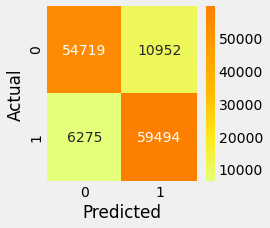

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     65671
           1       0.84      0.90      0.87     65769

    accuracy                           0.87    131440
   macro avg       0.87      0.87      0.87    131440
weighted avg       0.87      0.87      0.87    131440



In [40]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Applying Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9998972907584507
Testing Accuracy : 0.8879260499087036


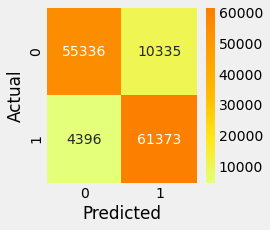

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     65671
           1       0.86      0.93      0.89     65769

    accuracy                           0.89    131440
   macro avg       0.89      0.89      0.89    131440
weighted avg       0.89      0.89      0.89    131440



In [42]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Cross Validation

In [43]:
#from sklearn.model_selection import cross_val_score

#clf = RandomForestClassifier()
#scores = cross_val_score(clf, x_train, y_train, cv=10)
#print(scores.mean())